In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [208]:
path=os.getcwd()+'\\dump'

In [209]:
archivos=glob.glob(path+'/*')

In [210]:
i=0
df_medium=pd.read_csv(archivos[0])
for name in archivos[1:]:
    df=pd.read_csv(name)
    df_medium=pd.concat([df,df_medium])


In [211]:
df_final=df_medium.drop(columns='Unnamed: 0')

In [212]:
df_final.head()

,0,1,2,3
0,Weezer,rock,My Name Is Jonas,"Unfortunately, we are not licensed to display ..."
1,Weezer,rock,No One Else,"Unfortunately, we are not licensed to display ..."
2,Weezer,rock,The World Has Turned And Left Me Here,"Unfortunately, we are not licensed to display ..."
3,Weezer,rock,Buddy Holly,"Unfortunately, we are not licensed to display ..."
4,Weezer,rock,Undone - The Sweater Song,"Unfortunately, we are not licensed to display ..."


In [213]:
bandas=df_final['0'].value_counts()
canciones=df_final['1'].value_counts()

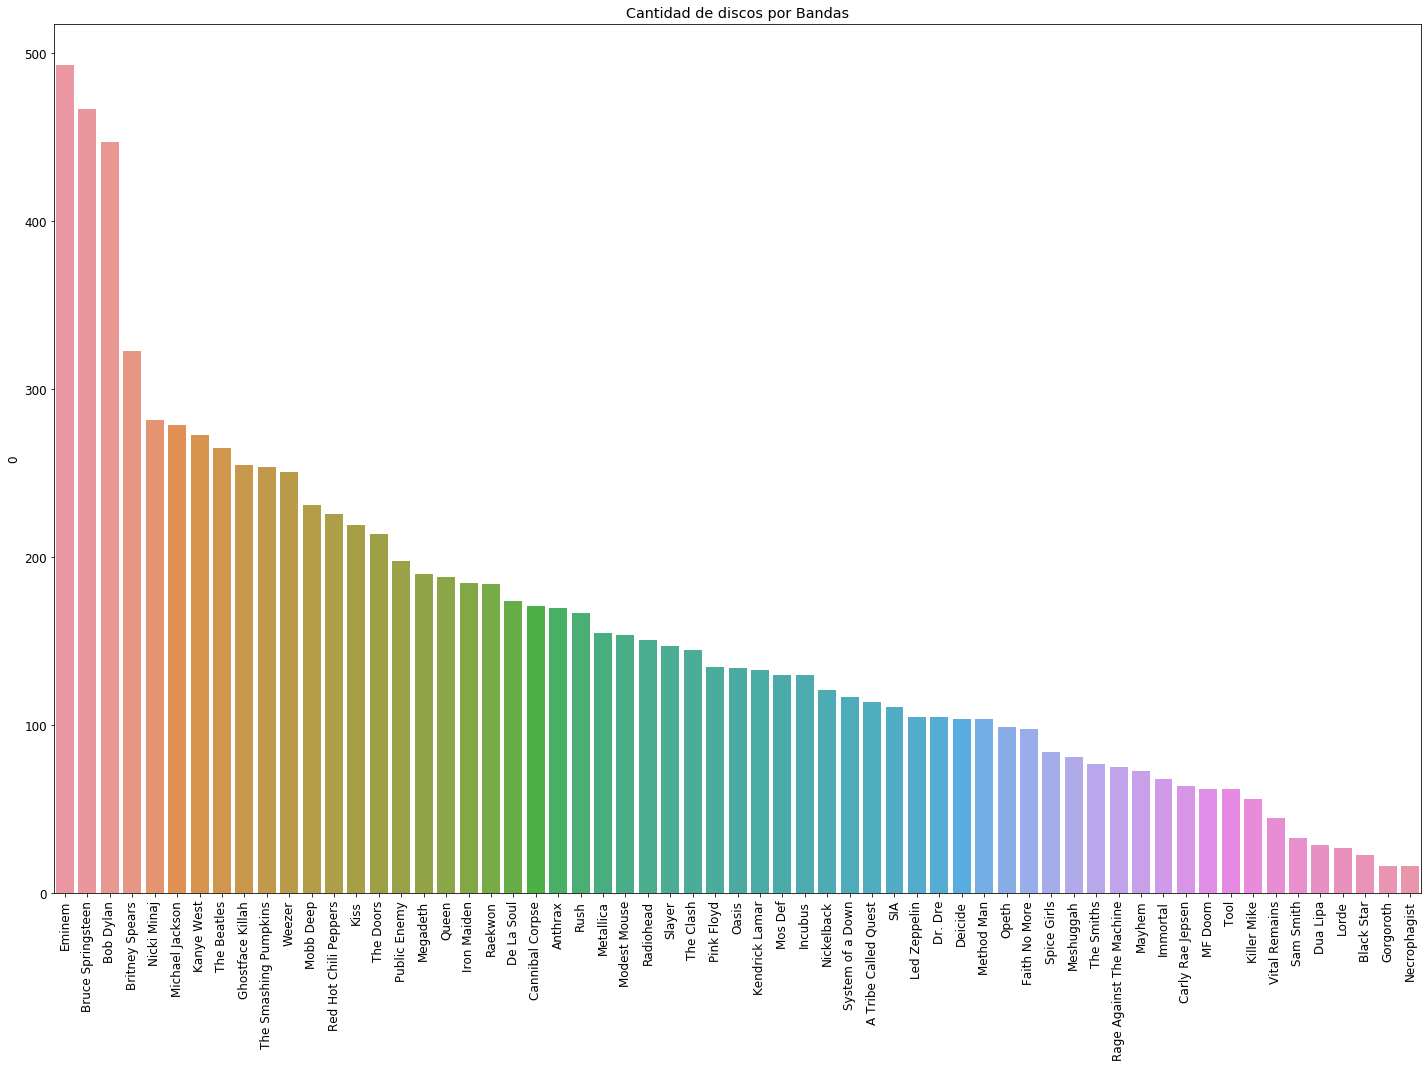

In [214]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(20,15))
sns.barplot(y=bandas, x=bandas.index)
plt.title('Cantidad de discos por Bandas')
plt.xticks(rotation= 90 )
plt.tight_layout()

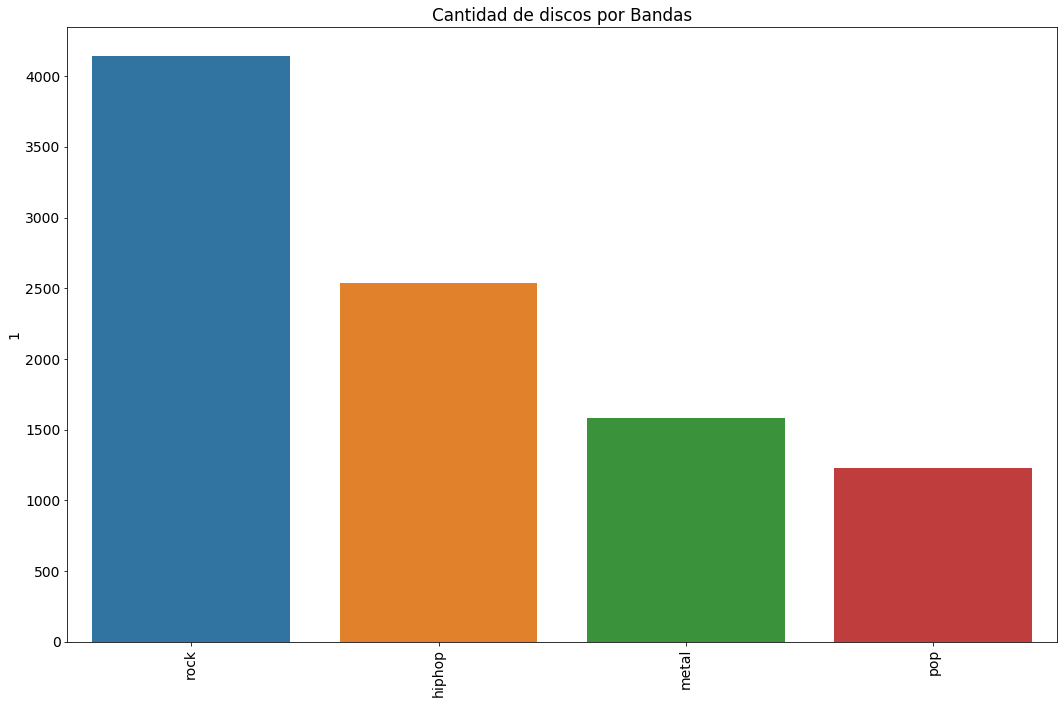

In [267]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15,10))
sns.barplot(y=canciones, x=canciones.index)
plt.title('Cantidad de discos por Bandas')
plt.xticks(rotation= 90 )
plt.tight_layout()

In [216]:
from sklearn.feature_extraction.text import CountVectorizer

#Instanciamos un objeto
count_vectorizer= CountVectorizer(stop_words='english')

#Implementamos los pasos fit y transform
count_vectorizer_fit=count_vectorizer.fit_transform(df_final['3'])

#Extraemos tokens (palabras)
words= count_vectorizer.get_feature_names()

#Extraemos Frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

In [217]:
d = {'Palabra': words, 'Frecuencía': words_freq}
Palabras_comunes= pd.DataFrame(data=d)

In [218]:
Palabras_comunes.sort_values('Frecuencía', ascending=False).head(100)

,Palabra,Frecuencía
24950,like,19629
12859,don,17398
23856,know,14962
18439,got,14171
23287,just,13978
...,...,...
11041,death,1897
24615,left,1895
43442,thing,1882
14305,end,1829


Separamos la base de datos por genero de música

In [219]:
rock=df_final[df_final['1']=='rock']
metal=df_final[df_final['1']=='metal']
hiphop=df_final[df_final['1']=='hiphop']
pop=df_final[df_final['1']=='pop']

In [256]:
def count(rock):
    #Instanciamos un objeto
    count_vectorizer= CountVectorizer(stop_words='english')

    #Implementamos los pasos fit y transform
    count_vectorizer_fit=count_vectorizer.fit_transform(rock['3'])

    #Extraemos tokens (palabras)
    words= count_vectorizer.get_feature_names()

    #Extraemos Frecuencia
    words_freq= count_vectorizer_fit.toarray().sum(axis=0)

    d = {'Palabra': words, 'Frecuencía': words_freq}
    Palabras= pd.DataFrame(data=d)

    return Palabras.sort_values('Frecuencía', ascending=False).head(100)
    

In [257]:
#Palabras Rock
rocktop100=count(rock)
rocktop100.head(100)

,Palabra,Frecuencía
5282,don,5284
10362,love,5114
9697,know,4702
12077,oh,4258
20056,yeah,4157
...,...,...
18247,town,558
6337,fall,548
14819,round,548
4527,days,542


In [258]:
#Palabras Metal
metaltop100=count(metal)
metaltop100.head(100)


,Palabra,Frecuencía
7883,life,1233
4088,don,1181
3284,death,1139
13844,time,1096
7977,ll,1069
...,...,...
13839,till,215
5939,good,214
11666,save,213
13041,stop,211


In [259]:
#Palabras HipHop
hiphoptop100=count(hiphop)
hiphoptop100.head(100)

,Palabra,Frecuencía
18361,like,12055
13533,got,7613
9466,don,7604
17532,know,6535
17082,just,6272
...,...,...
31521,talk,823
18961,ma,821
34088,verse,820
5866,chorus,811


In [260]:
#Palabras Pop
poptop100=count(pop)
poptop100.head(100)

,Palabra,Frecuencía
3135,don,3329
6219,like,2995
6390,love,2914
7455,oh,2737
5918,know,2677
...,...,...
878,believe,282
10873,thing,274
3641,everybody,270
3429,eh,269


In [237]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix , classification_report


In [246]:
to_predict=['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris - Move B*tch
'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates', # IDLES - Mother
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to \
build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting\
You are not deserving, you are not deserving" #Banks - Drowning
]

In [249]:
X_train, X_test, y_train, y_test = train_test_split(df_final['3'],df_final['1'],test_size=0.4, random_state=238)

In [251]:
pipeline_model = Pipeline([('vectorize', CountVectorizer()),
                           ('model', MultinomialNB())])

In [252]:
pipeline_model.fit(X_train, y_train)
y_predict=pipeline_model.predict(to_predict)
y_prueba=pipeline_model.predict(X_test)

In [262]:
#Revisamos que tal funciona el algoritmo reconociendo a que genero pertenecen las canciones con un nuevo vector objetivo
y_predict

array(['rock', 'metal', 'rock', 'hiphop', 'metal', 'rock'], dtype='<U6')

In [265]:
cnf = confusion_matrix(y_test , y_prueba)

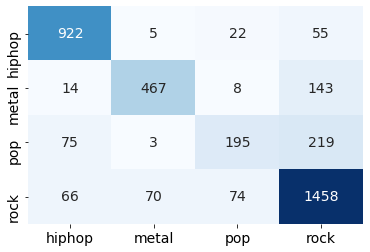

In [266]:
target_label=pipeline_model.classes_
sns.heatmap(cnf,annot=True,fmt='d',cbar=False,cmap='Blues',
           xticklabels=target_label,yticklabels=target_label);

In [255]:
print(classification_report(y_test , y_prueba))

              precision    recall  f1-score   support

      hiphop       0.86      0.92      0.89      1004
       metal       0.86      0.74      0.79       632
         pop       0.65      0.40      0.49       492
        rock       0.78      0.87      0.82      1668

    accuracy                           0.80      3796
   macro avg       0.79      0.73      0.75      3796
weighted avg       0.80      0.80      0.79      3796

